In [11]:
# Step 1: Import Library yang Dibutuhkan
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay

# Step 2: Muat Data
data = pd.read_csv('tugasxgboost2.csv', delimiter=';')

In [12]:
# Step 3: Pisahkan Fitur dan Target
# Anggap kolom terakhir adalah target, jika tidak, sesuaikan nama kolom
X = data.iloc[:, :-1]  # Semua kolom kecuali yang terakhir
y = data.iloc[:, -1]   # Kolom terakhir sebagai target

In [13]:
# Step 4: Bagi Data ke dalam Training dan Testing Set
# Periksa bentuk dan contoh data
print("Bentuk X:", X.shape)
print("Bentuk y:", y.shape)
print("Contoh data X:\n", X.head())
print("Contoh data y:\n", y.head())




print("Bentuk X setelah perbaikan:", X.shape)
print("Bentuk y setelah perbaikan:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Melatih Model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

Bentuk X: (4898, 11)
Bentuk y: (4898,)
Contoh data X:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1    

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

<Figure size 1000x600 with 0 Axes>

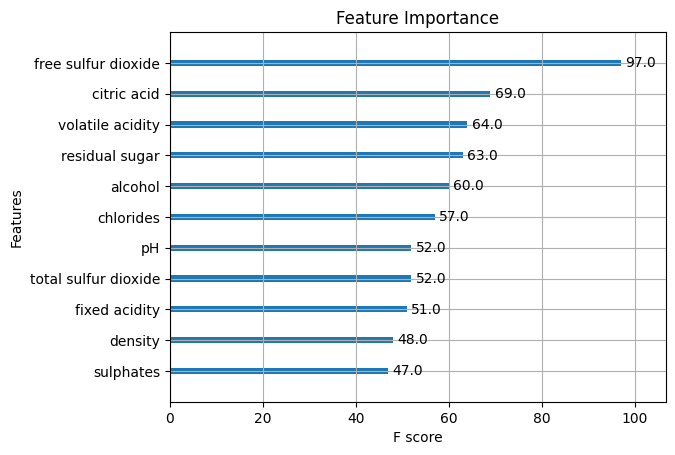

<Figure size 2000x1000 with 0 Axes>

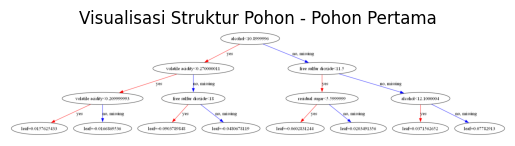

In [14]:
# Step 6: Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

# Step 7: Visualisasi Struktur Pohon
plt.figure(figsize=(20, 10))
xgb.plot_tree(model, num_trees=0)  # num_trees=0 untuk pohon pertama
plt.title("Visualisasi Struktur Pohon - Pohon Pertama")
plt.show()

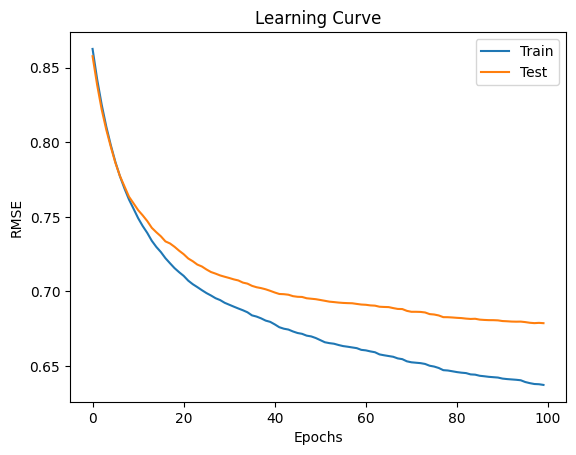

In [17]:
# Step 5: Melatih Model XGBoost dengan eval_set dan eval_metric
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, eval_metric="rmse")
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Step 8: Learning Curve
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot RMSE untuk Training dan Validation
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.show()


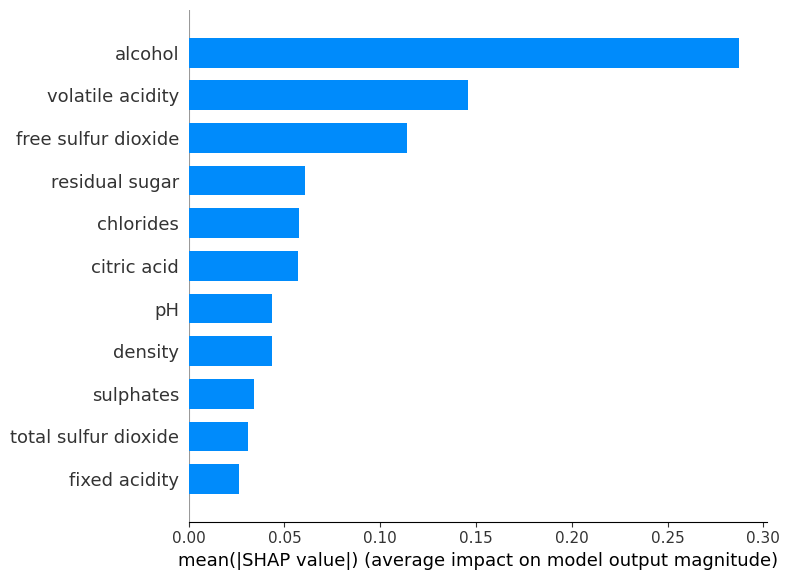

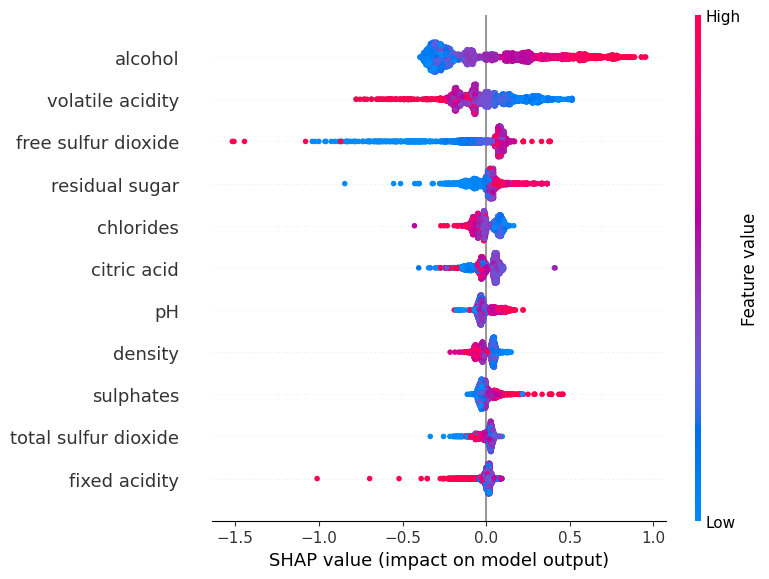

In [18]:
# Step 9: SHAP Values
# Memulai SHAP dan menghitung nilai SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)

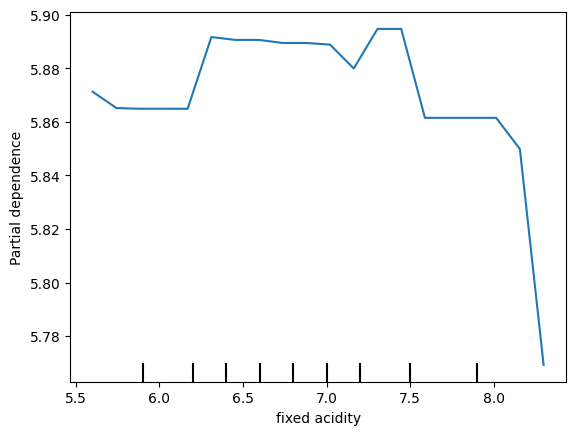

In [20]:
# Step 10: Partial Dependence Plot
# Melakukan Partial Dependence Plot untuk fitur pertama (ubah sesuai kebutuhan)
feature = X_train.columns[0]
PartialDependenceDisplay.from_estimator(model, X_train, [feature], grid_resolution=20)
plt.show()
